# Part 1 - Scalars and Vectors

For the questions below it is not sufficient to simply provide answer to the questions, but you must solve the problems and show your work using python (the NumPy library will help a lot!) Translate the vectors and matrices into their appropriate python  representations and use numpy or functions that you write yourself to demonstrate the result or property. 

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from mpl_toolkits.mplot3d import Axes3D

## 1.1 Create a two-dimensional vector and plot it on a graph

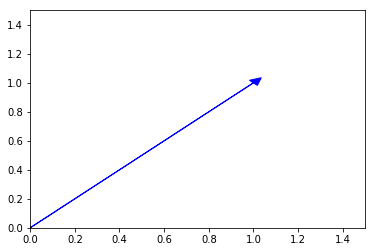

In [2]:
vector = np.array([1,1])
plt.arrow(0,0, vector[0], vector[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)
plt.show()

## 1.2 Create a three-dimensional vecor and plot it on a graph

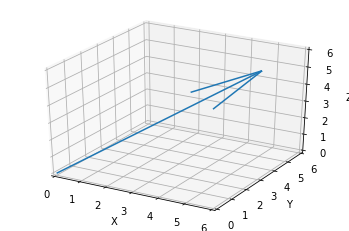

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0,0,0,5,5,5)
ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.set_zlim([0, 6])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## 1.3 Scale the vectors you created in 1.1 by $5$, $\pi$, and $-e$ and plot all four vectors (original + 3 scaled vectors) on a graph. What do you notice about these vectors? 

They all lie on the same line-plane (heh cant think of correct term)-  the original vector, scaled by 5 and pi is just ~3.14 and 5x as long, and scaled by -e just goes in opposite direction from the origin and is scaled by ~2.71.

In [0]:
v5 = vector*5
v_pi = vector*math.pi
v_neg_e = vector*(-math.e)

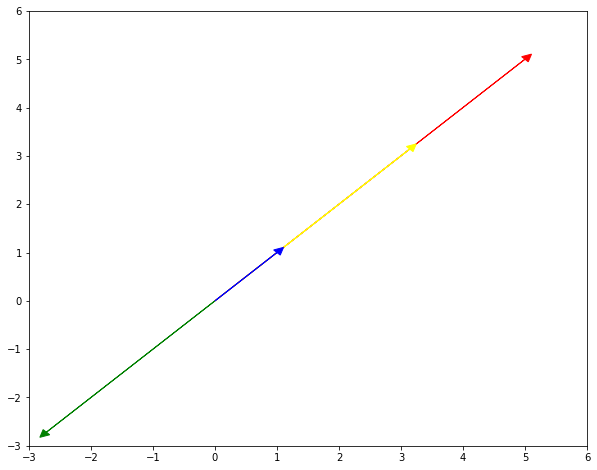

In [5]:
fig, ax = plt.subplots(figsize=(10,8))

plt.arrow(0,0, v5[0], v5[1], head_width=.15, head_length=0.15, color='red')
plt.arrow(0,0, v_pi[0], v_pi[1], head_width=.15, head_length=0.15, color='yellow')
plt.arrow(0,0, v_neg_e[0], v_neg_e[1], head_width=.15, head_length=0.15, color='green')
plt.arrow(0,0, vector[0], vector[1], head_width=.15, head_length=0.15, color ='blue')
plt.xlim(-3,6)
plt.ylim(-3,6)
plt.show()

## 1.4 Graph vectors $\vec{a}$ and $\vec{b}$ and plot them on a graph

\begin{align}
\vec{a} = \begin{bmatrix} 5 \\ 7 \end{bmatrix}
\qquad
\vec{b} = \begin{bmatrix} 3 \\4 \end{bmatrix}
\end{align}

## 1.5 find $\vec{a} - \vec{b}$ and plot the result on the same graph as $\vec{a}$ and $\vec{b}$. Is there a relationship between vectors $\vec{a} \thinspace, \vec{b} \thinspace \text{and} \thinspace \vec{a-b}$

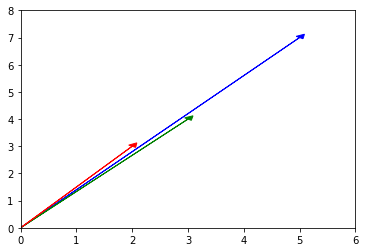

In [6]:
a = np.array([5, 7])
b = np.array([3, 4])
a_minus_b = a-b

plt.arrow(0,0, a[0], a[1], head_width=.15, head_length=0.15, color ='blue')
plt.arrow(0,0, b[0], b[1], head_width=.15, head_length=0.15, color ='green')
plt.arrow(0,0, a_minus_b[0], a_minus_b[1], head_width=.15, head_length=0.15, color ='red')
plt.xlim(0, 6)
plt.ylim(0,8)
plt.show()


## 1.6 Find $c \cdot d$

\begin{align}
\vec{c} = \begin{bmatrix}7 & 22 & 4 & 16\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}12 & 6 & 2 & 9\end{bmatrix}
\end{align}


In [7]:
c = np.array([7, 22, 4, 16])
d = np.array([12, 6, 2, 9])

c_dot_d = np.dot(c,d)
c_dot_d

368

##  1.7 Find $e \times f$

\begin{align}
\vec{e} = \begin{bmatrix} 5 \\ 7 \\ 2 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\4 \\ 6 \end{bmatrix}
\end{align}

In [8]:
e = np.array([5,7,2])
f = np.array([3,4,6])

e_cross_f = np.cross(e, f)
e_cross_f

array([ 34, -24,  -1])

## 1.8 Find $||g||$ and then find $||h||$. Which is longer?

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 8 \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 3 \\3 \\ 3 \\ 3 \end{bmatrix}
\end{align}

In [9]:
g = np.array([1,1,1,8])
h = np.array([3,3,3,3])
g_norm = np.linalg.norm(g)
h_norm = np.linalg.norm(h)
print(g_norm)
print(h_norm)

8.18535277187245
6.0


g_norm is longer

## 1.9 Show that the following vectors are orthogonal (perpendicular to each other):

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 0 \\ -1  \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 1 \\ \sqrt{2} \\ 1 \end{bmatrix}
\end{align}

In [10]:
g = np.array([1,0,-1])
h = np.array([1,2**(.5), 1])

np.dot(g, h)

0.0

Since the dot product of these vectors = 0, they are othogonal

# Part 2 - Matrices

## 2.1 What are the dimensions of the following matrices? Which of the following can be multiplied together? See if you can find all of the different legal combinations.
\begin{align}
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\qquad
B = \begin{bmatrix}
2 & 4 & 6 \\
\end{bmatrix}
\qquad
C = \begin{bmatrix}
9 & 6 & 3 \\
4 & 7 & 11
\end{bmatrix}
\qquad
D = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\qquad
E = \begin{bmatrix}
1 & 3 \\
5 & 7
\end{bmatrix}
\end{align}

In [0]:
A = np.matrix('1 2; 3 4; 5 6')
B = np.matrix('2 4 6')
C = np.matrix('9 6 3; 4 7 11')
D = np.matrix('1 0 0; 0 1 0; 0 0 1')
E = np.matrix('1 3; 5 7')

A is 3x2

B is 1x3

C is 2x3

D is 3x3

E is 2x2

A can be multiplied by C and E: (A x C), (A x E)

B can be multiplied by A and D: (B x A), (B x D)

C can be multiplied by A and D: (C x A), (C x D)

D can be multiplied by A: (D x A)

E can be multiplied by C: (E x C)

## 2.2 Find the following products: CD, AE, and BA. What are the dimensions of the resulting matrices? How does that relate to the dimensions of their factor matrices?

In [12]:
CD = np.matmul(C, D)
AE = np.matmul(A, E)
BA = np.matmul(B, A)

print(CD)
print(AE)
print(BA)

[[ 9  6  3]
 [ 4  7 11]]
[[11 17]
 [23 37]
 [35 57]]
[[44 56]]


CD is a 2 x 3 matrix

AE is a 3 x 2 matrix

BA is a 1 x 2 matrix

The rows correspond to the number of columns from the first or left matrix, and the columns correspond to the number of rows from the second or right matrix

## 2.3  Find $F^{T}$. How are the numbers along the main diagonal (top left to bottom right) of the original matrix and its transpose related? What are the dimensions of $F$? What are the dimensions of $F^{T}$?

\begin{align}
F = 
\begin{bmatrix}
20 & 19 & 18 & 17 \\
16 & 15 & 14 & 13 \\
12 & 11 & 10 & 9 \\
8 & 7 & 6 & 5 \\
4 & 3 & 2 & 1
\end{bmatrix}
\end{align}

In [13]:
F = np.matrix('20 19 18 17; 16 15 14 13; 12 11 10 9; 8 7 6 5; 4 3 2 1')
F_t = F.T

F_t

matrix([[20, 16, 12,  8,  4],
        [19, 15, 11,  7,  3],
        [18, 14, 10,  6,  2],
        [17, 13,  9,  5,  1]])

The main diagonal is the same.

The dimensions of F are 5 x 4
The dimensions of F_transpose are 4 x 5

# Part 3 - Square Matrices

## 3.1 Find $IG$ (be sure to show your work) 😃

\begin{align}
G= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\end{align}

In [14]:
G = np.matrix('12 11; 7 10')
G_inverse = np.linalg.inv(G)
G_identity_matrix = np.matmul(G, G_inverse)

G_identity_matrix

matrix([[1.00000000e+00, 5.55111512e-16],
        [2.22044605e-16, 1.00000000e+00]])

## 3.2 Find $|H|$ and then find $|J|$.

\begin{align}
H= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
J= 
\begin{bmatrix}
0 & 1 & 2 \\
7 & 10 & 4 \\
3 & 2 & 0
\end{bmatrix}
\end{align}


In [15]:
H = np.matrix('12 11; 7 10')
J = np.matrix('0 1 2; 7 10 4; 3 2 0')

H_determinant = np.linalg.det(H)
J_determinant = np.linalg.det(J)

print(H_determinant)
print(J_determinant)

43.000000000000014
-19.999999999999996


## 3.3 Find H^{-1} and then find J^{-1}

In [0]:
H_inverse = np.linalg.inv(H)
J_inverse = np.linalg.inv(J)

In [17]:
print(H_inverse)
print(J_inverse)

[[ 0.23255814 -0.25581395]
 [-0.1627907   0.27906977]]
[[ 0.4  -0.2   0.8 ]
 [-0.6   0.3  -0.7 ]
 [ 0.8  -0.15  0.35]]


## 3.4 Find $HH^{-1}$ and then find $G^{-1}G$. Is $HH^{-1} == G^{-1}G$? Why or Why not?

In [0]:
H_H_inv = np.matmul(H, H_inverse)
G_inv_G = np.matmul(G_inverse, G)

In [19]:
print(H_H_inv)
print(G_inv_G)

[[1.00000000e+00 5.55111512e-16]
 [2.22044605e-16 1.00000000e+00]]
[[1.00000000e+00 6.66133815e-16]
 [1.11022302e-16 1.00000000e+00]]


They are both the identity matrix for a 2x2 square matrix, however the float that represents 0 are not rounded exactly to 0 so they are not precisely the same matrix in the computers memory

# Stretch Goals: 

A reminder that these challenges are optional. If you finish your work quickly we welcome you to work on them. If there are other activities that you feel like will help your understanding of the above topics more, feel free to work on that. Topics from the Stretch Goals sections will never end up on Sprint Challenges. You don't have to do these in order, you don't have to do all of them. 

- Write a function that can calculate the dot product of any two vectors of equal length that are passed to it.
- Write a function that can calculate the norm of any vector
- Prove to yourself again that the vectors in 1.9 are orthogonal by graphing them. 
- Research how to plot a 3d graph with animations so that you can make the graph rotate (this will be easier in a local notebook than in google colab)
- Create and plot a matrix on a 2d graph.
- Create and plot a matrix on a 3d graph.
- Plot two vectors that are not collinear on a 2d graph. Calculate the determinant of the 2x2 matrix that these vectors form. How does this determinant relate to the graphical interpretation of the vectors?



In [0]:
#Write a function that can calculate the dot product of any two vectors of equal length that are passed to it.

def calc_dot_prod(v1, v2):
  if len(v1) != len(v2):
    return 'Cannot compute dot product for vectors of unequal length'
  else:
    return sum(v1[i]*v2[i] for i in range(len(v1)))

In [21]:
v1 = [5,4,3,2]
v2 = [2,4,6,8]

print(np.dot(v1, v2) == calc_dot_prod(v1, v2))

True


In [0]:
#Write a function that can calculate the norm of any vector:

def calc_norm(v):
  return sum(v[i]**2 for i in range(len(v)))**(0.5)

In [23]:
v = [9,6,3]

print(np.linalg.norm(v) == calc_norm(v))

True


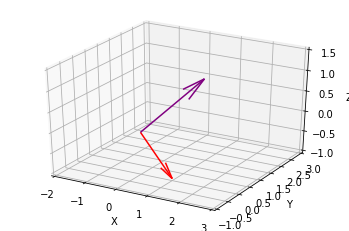

In [30]:
#Prove to yourself again that the vectors in 1.9 are orthogonal by graphing them.

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0,0,0,1,0,-1, color='red')
ax.quiver(0,0,0,1,2**(0.5),1, color = 'purple')
ax.set_xlim([-2, 3])
ax.set_ylim([-1, 3])
ax.set_zlim([-1, 1.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()